# Predictive Analysis of COVID-19 Outbreak

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Import-and-Understand-Source-Dataset" data-toc-modified-id="Import-and-Understand-Source-Dataset-2">Import and Understand Source Dataset</a></span><ul class="toc-item"><li><span><a href="#Time-series-data-for-the-United-States" data-toc-modified-id="Time-series-data-for-the-United-States-2.1">Time-series data for the United States</a></span></li><li><span><a href="#Time-series-data-at-the-country-level-around-the-world" data-toc-modified-id="Time-series-data-at-the-country-level-around-the-world-2.2">Time-series data at the country level around the world</a></span><ul class="toc-item"><li><span><a href="#Splitting-records-by-different-matching-types" data-toc-modified-id="Splitting-records-by-different-matching-types-2.2.1">Splitting records by different matching types</a></span></li><li><span><a href="#Summarize-and-repair-the-time-series-global-confirmed-cases" data-toc-modified-id="Summarize-and-repair-the-time-series-global-confirmed-cases-2.2.2">Summarize and repair the time-series global confirmed cases</a></span></li><li><span><a href="#Summarize-and-repair-the-time-series-COVID-19-deaths-globally" data-toc-modified-id="Summarize-and-repair-the-time-series-COVID-19-deaths-globally-2.2.3">Summarize and repair the time-series COVID-19 deaths globally</a></span></li><li><span><a href="#Summarize-and-repair-the-time-series-global-recovered-cases" data-toc-modified-id="Summarize-and-repair-the-time-series-global-recovered-cases-2.2.4">Summarize and repair the time-series global recovered cases</a></span></li></ul></li></ul></li><li><span><a href="#Predictive-Analysis" data-toc-modified-id="Predictive-Analysis-3">Predictive Analysis</a></span><ul class="toc-item"><li><span><a href="#Polynomial-Regression" data-toc-modified-id="Polynomial-Regression-3.1">Polynomial Regression</a></span><ul class="toc-item"><li><span><a href="#Confirmed-Cases-with-PR-model" data-toc-modified-id="Confirmed-Cases-with-PR-model-3.1.1">Confirmed Cases with PR model</a></span></li><li><span><a href="#Deaths-with-PR" data-toc-modified-id="Deaths-with-PR-3.1.2">Deaths with PR</a></span></li></ul></li><li><span><a href="#Neural-Network" data-toc-modified-id="Neural-Network-3.2">Neural Network</a></span><ul class="toc-item"><li><span><a href="#Confirmed-Cases-with-NN" data-toc-modified-id="Confirmed-Cases-with-NN-3.2.1">Confirmed Cases with NN</a></span></li><li><span><a href="#Deaths-with-NN" data-toc-modified-id="Deaths-with-NN-3.2.2">Deaths with NN</a></span></li></ul></li></ul></li><li><span><a href="#SIR-Model" data-toc-modified-id="SIR-Model-4">SIR Model</a></span><ul class="toc-item"><li><span><a href="#Basic-Reproduction-Number" data-toc-modified-id="Basic-Reproduction-Number-4.1">Basic Reproduction Number</a></span><ul class="toc-item"><li><span><a href="#How-a-R0-is-computed?" data-toc-modified-id="How-a-R0-is-computed?-4.1.1">How a <code>R0</code> is computed?</a></span></li><li><span><a href="#How-to-understand-R0?" data-toc-modified-id="How-to-understand-R0?-4.1.2">How to understand <code>R0</code>?</a></span></li></ul></li><li><span><a href="#Fit-the-SIR-Model-per-country" data-toc-modified-id="Fit-the-SIR-Model-per-country-4.2">Fit the SIR Model per country</a></span><ul class="toc-item"><li><span><a href="#The-initial-batch-of-SIR-Model-fitting" data-toc-modified-id="The-initial-batch-of-SIR-Model-fitting-4.2.1">The initial batch of SIR Model fitting</a></span></li><li><span><a href="#The-second-batch-of-SIR-Model-fitting" data-toc-modified-id="The-second-batch-of-SIR-Model-fitting-4.2.2">The second batch of SIR Model fitting</a></span></li><li><span><a href="#The-final-batch-of-SIR-Model-fitting" data-toc-modified-id="The-final-batch-of-SIR-Model-fitting-4.2.3">The final batch of SIR Model fitting</a></span></li><li><span><a href="#Consider-the-social-distancing-effect-in-SIR-Model-fitting" data-toc-modified-id="Consider-the-social-distancing-effect-in-SIR-Model-fitting-4.2.4">Consider the social distancing effect in SIR Model fitting</a></span></li></ul></li></ul></li><li><span><a href="#Comparison-between-models" data-toc-modified-id="Comparison-between-models-5">Comparison between models</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6">Conclusions</a></span></li><li><span><a href="#References" data-toc-modified-id="References-7">References</a></span></li></ul></div>

## Introduction

Dashboards, statistics, and other information about the `COVID-19` are floating all over the internet, and different countries or regions are adopting varied strategies, from complete lockdown, to social distancing, to herd immunity, you might be confused at what is the right strategy, and which information is valid. This notebook is not providing you a final answer, but tools or methods that you can try yourself in performing data modeling, analyzing, and predicting the spread of COVID-19 with the `ArcGIS API for Python`, and other libraries such as `pandas` and `numpy`. Hopefully, given the workflow demonstrations, you are able to find the basic facts, current patterns, and future trends behind the common notions about how COVID-19 spread from a dataset perspective.

Before we dive into data science and analytics, let's start with importing the necessary modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import and Understand Source Dataset

Among all the official and unofficial data sources on the web providing COVID-19 related data, one of the most widely used dataset today is the one provided by the John Hopkins University's Center for Systems Science and Engineering (JHU CSSE), which can be accessed on GitHub under the name -  <a href="https://github.com/CSSEGISandData/COVID-19">Novel Coronavirus (COVID-19) Cases, provided by JHU CSSE</a>. The time-series consolidated data needed for all the analysis to be performed in this notebook fall into these two categories:
  1. Type: Confirmed Cases, Deaths, and the Recovered;
  2. Geography: Global, and the United States only.
  
Now let's first look at the U.S. dataset.

### Time-series data for the United States

The dataset can be directly imported into data-frames with `read_csv` method in `Pandas`. Compared to downloading the file manually and then read it, it is preferred to use the URLs (which point to the CSV files archived on GitHub) because as situation changes, it becomes easier to load and refresh the analysis with new data. 

Now, let's read the time-series data of the confirmed COVID-19 cases in the United States from the GitHub source url, into a Pandas DataFrame:

In [2]:
# read time-series csv
usa_ts_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
usa_ts_df = pd.read_csv(usa_ts_url, header=0, escapechar='\\')
usa_ts_df.head(5)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,141,141,141,141,145,145,145,145,145,145
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,14,14,14,14,14,14,14,14,14,14
3,630.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,1371,1389,1400,1433,1539,1575,1757,1808,1843,1924
4,850.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,57,57,57,57,66,66,66,66,66,66


In [3]:
usa_ts_df.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '4/26/20', '4/27/20', '4/28/20', '4/29/20', '4/30/20', '5/1/20',
       '5/2/20', '5/3/20', '5/4/20', '5/5/20'],
      dtype='object', length=116)

As we can see from the printouts of `usa_ts_df.columns`, the first 11 columns are displayed as `['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_']`, while the rest of the columns are dates from `1/22/20` to the most current date on record.

In [4]:
date_list = usa_ts_df.columns.tolist()[11:]
date_list[0], date_list[-1]

('1/22/20', '5/5/20')

If you wonder in which state(s) the first COVID-19 case was confirmed and reported, use the cell below to check for first occurrence - in this case, the **Washington** State.

In [5]:
usa_ts_df_all_states = usa_ts_df.groupby('Province_State').sum()[date_list]
usa_ts_df_all_states[usa_ts_df_all_states['1/22/20']>0]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Washington,1,1,1,1,1,1,1,1,1,1,...,13521,13686,13842,14070,14327,14637,15003,15185,15462,15594


Or if you want to query for the **top 10 states** with the highest numbers of confirmed cases for the time being, run the following cell to display the query results.

In [6]:
usa_ts_df_all_states[date_list[-1]].sort_values(ascending = False).head(10)

Province_State
New York         321192
New Jersey       130593
Massachusetts     70271
Illinois          65889
California        58456
Pennsylvania      53864
Michigan          44451
Florida           37439
Texas             33912
Connecticut       30621
Name: 5/5/20, dtype: int64

The approach is quite similar if you want to query for the top 10 states with the lowest numbers of confirmed cases, just by simply changing the `ascending` order from `False` to `True`:

In [7]:
usa_ts_df_all_states[date_list[-1]].sort_values(ascending = True).head(10)

Province_State
American Samoa                0
Northern Mariana Islands     14
Diamond Princess             49
Virgin Islands               66
Grand Princess              103
Guam                        145
Alaska                      371
Montana                     456
Wyoming                     604
Hawaii                      625
Name: 5/5/20, dtype: int64

As shown above, currently the state with the highest confirmed cases is the **New York** State, while the **American Samoa** is that of the lowest confirmed cases, as of 5/5/2020. Also, if you are only interested in finding out which state has the highest confirmed cases instead of the top 10, you can just run the cells below for an exact query result, and its time-series:

In [8]:
# state name, and the current number of confirmed
usa_ts_df_all_states[date_list[-1]].idxmax(), usa_ts_df_all_states[date_list[-1]].max()

('New York', 321192)

In [9]:
usa_ts_df[usa_ts_df['Province_State']=="New York"].sum()[date_list]

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
5/1/20     308314
5/2/20     312977
5/3/20     316415
5/4/20     318953
5/5/20     321192
Length: 105, dtype: object

### Time-series data at the country level around the world

Besides the U.S. dataset, we can also read the time-series data of the confirmed COVID-19 cases globally from the GitHub source url, into a Pandas DataFrame, again:

In [10]:
world_confirmed_ts_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
world_confirmed_ts_df = pd.read_csv(world_confirmed_ts_url, header=0, escapechar='\\')
world_confirmed_ts_df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,726,736,750,766,773,782,789,795,803,820
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,738,743,743,743,745,745,747,748,750,751
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,26,27,27,27,27,30,35,35,35,36


#### Splitting records by different matching types

Though most of the rows in `world_confirmed_ts_df` DataFrame are the statistics at country-level (`one-row-to-one-country matching`), there are several countries listed in the DataFrame as an aggregation of provinces or states (`many-rows-to-one-country matching`). For instance, as shown below, the confirmed cases of **Australia** can be shown in the 8 rows printed.

In [11]:
world_confirmed_ts_df[world_confirmed_ts_df["Province/State"].notna()].head(8)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,106,106,106,106,106,106,106,106,107,107
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,3002,3004,3016,3016,3025,3030,3035,3033,3035,3042
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,28,28,28,28,28,27,29,29,29,29
11,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,1030,1033,1034,1033,1033,1034,1035,1038,1043,1043
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,438,438,438,438,438,438,438,438,438,438
13,Tasmania,Australia,-41.4545,145.9707,0,0,0,0,0,0,...,212,214,218,219,221,221,221,221,221,225
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,1349,1349,1354,1361,1364,1371,1384,1406,1423,1440
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,549,549,550,551,551,551,551,551,551,551


Browsing all the selected rows from above, we come to an conclusion that these five countries - `Australia, Canada, China, Denmark, and France` - are of the `many-rows-to-one-country matching`, and we need to summarize these rows into a single record, if such a row does not exist already. The following cell is to rule out the countries that are provided not only `many-rows-to-one-country matching` but also `one-row-to-one-country matching`.

In [12]:
for country in ["Australia", "Canada", "China", "Denmark", "France"]:
    df = world_confirmed_ts_df[world_confirmed_ts_df["Province/State"].isna()]
    df = df[df["Country/Region"]==country]
    if df.size:
        display(df)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
94,NaN,Denmark,56.2639,9.5018,0,0,0,0,0,0,...,8575,8698,8851,9008,9158,9311,9407,9523,9670,9821


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
116,NaN,France,46.2276,2.2137,0,0,2,3,3,3,...,160847,164589,167605,165093,165764,165764,166976,167272,167886,168935


To summarize, we now can split the records into three matching types:
  1. Countries with both `many-rows-to-one-country matching` and `one-row-to-one-country matching` data, e.g. **Denmark, and France**.
  2. Countries with only `many-rows-to-one-country matching` data, e.g. **Australia, Canada, and China**.
  3. Countries with only `one-row-to-one-country matching` data - rest of all countries in the DataFrame.
  
That being said, we would only need to summarize and repair the data for countries of type #2, which are _Australia, Canada, and China_.

#### Summarize and repair the time-series global confirmed cases

The method `sum_all_provinces_in_country` to be defined in the next cell performs these tasks:
  - query all sub-records of the selected country
  - create a new row which is to sum all statistics of this country, and assign the summed value of all sub-records to the date_time column of the new row
  - assign the constants to the ['Province/State', 'Country/Region', 'Lat', 'Long'] columns; note that the `Country/Region` column will be renamed from solely the country name to country name + ", Sum".
  - append the new row to the original DataFrame, and remove the sub-records of the selected country.
  
We will run the method against the subset of countries in type #2, which are  _Australia, Canada, and China_.

In [13]:
def sum_all_provinces_in_country(df, country):
    
    # query all sub-records of the selected country
    tmp_df = df[df["Country/Region"]==country]
    
    # create a new row which is to sum all statistics of this country, and 
    # assign the summed value of all sub-records to the date_time column of the new row
    sum_row = tmp_df.sum(axis=0)
    
    # assign the constants to the ['Province/State', 'Country/Region', 'Lat', 'Long'] columns; 
    # note that the Country/Region column will be renamed from solely the country name to country name + ", Sum".
    sum_row.loc['Province/State'] = "NaN"
    sum_row.loc['Country/Region'] = country + ", Sum"
    sum_row.loc['Lat'] = tmp_df['Lat'].values[0]
    sum_row.loc['Long'] = tmp_df['Long'].values[0]
    
    # append the new row to the original DataFrame, and 
    # remove the sub-records of the selected country.
    df = pd.concat([df, sum_row.to_frame().T], ignore_index=True)
    display(df[df["Country/Region"].str.contains(country + ", Sum")])
    df=df[df['Country/Region'] != country]
    
    return df

In [14]:
for country in ["Australia", "Canada", "China"]:
    world_confirmed_ts_df = sum_all_provinces_in_country(world_confirmed_ts_df, country)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
266,NaN,"Australia, Sum",-35.4735,149.012,0,0,0,0,4,5,...,6714,6721,6744,6752,6766,6778,6799,6822,6847,6875


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
259,NaN,"Canada, Sum",53.9333,-116.576,0,0,0,0,1,1,...,48033,49616,51150,52865,54457,56343,57926,60504,61957,63215


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
245,NaN,"China, Sum",31.8257,117.226,548,643,920,1406,2075,2877,...,83912,83918,83940,83944,83956,83959,83959,83964,83966,83968


Now with the data summarized and repaired, we are good to query for the **top 10 countries with the highest numbers of confirmed cases around the globe**. You can choose to list the entire time-series for these 10 countries, or just pick the country/region name, and the most current statistics.

In [15]:
world_confirmed_ts_df.sort_values(by = date_list[-1], ascending = False).head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
206,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,965785,988197,1012582,1039909,1069424,1103461,1132539,1158040,1180375,1204351
182,NaN,Spain,40,-4,0,0,0,0,0,0,...,207634,209465,210773,212917,213435,213435,216582,217466,218011,219329
118,NaN,Italy,43,12,0,0,0,0,0,0,...,197675,199414,201505,203591,205463,207428,209328,210717,211938,213013
204,NaN,United Kingdom,55.3781,-3.436,0,0,0,0,0,0,...,152840,157149,161145,165221,171253,177454,182260,186599,190584,194990
97,NaN,France,46.2276,2.2137,0,0,2,3,3,3,...,160847,164589,167605,165093,165764,165764,166976,167272,167886,168935
101,NaN,Germany,51,9,0,0,0,0,0,1,...,157770,158758,159912,161539,163009,164077,164967,165664,166152,167007
168,NaN,Russia,60,90,0,0,0,0,0,0,...,80949,87147,93558,99399,106498,114431,124054,134687,145268,155370
194,NaN,Turkey,38.9637,35.2433,0,0,0,0,0,0,...,110130,112261,114653,117589,120204,122392,124375,126045,127659,129491
20,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,63100,67446,73235,79685,87187,92202,97100,101826,108620,115455
114,NaN,Iran,32,53,0,0,0,0,0,0,...,90481,91472,92584,93657,94640,95646,96448,97424,98647,99970


In [20]:
# a simplified list
world_confirmed_ts_df[['Country/Region', date_list[-1]]].sort_values(by = date_list[-1], ascending = False).head(10)

,Country/Region,5/5/20
206,US,1204351
182,Spain,219329
118,Italy,213013
204,United Kingdom,194990
97,France,168935
101,Germany,167007
168,Russia,155370
194,Turkey,129491
20,Brazil,115455
114,Iran,99970


That compared to the top 10 countries with confirmed COVID-19 cases we fetched and sorted 6 weeks ago (as shown below, which collected at 03/23/2020), we can see how the ordering changed.


| Country_Region | Confirmed | Recovered | Deaths |
|----------------|----------|-----------|--------|
| China	| 81591 | 73280	| 3281 |
| Italy	| 69176	| 8326 | 6820 |
| United States	| 53660 | 0 | 703 |
| Spain	| 39885	| 3794 | 2808 |
| Germany | 32986 | 3243 | 157 |
| Iran | 24811 | 8913 | 1934 |
| France | 22622 | 3288	| 1102 |
| Switzerland | 9877 | 131 | 122 |
| South Korea | 9037 | 3507 | 120 |
| United Kingdom | 8164	| 140 | 423 |

<h5><center>Table 1. The top 10 countries with confirmed COVID-19 cases collected at 03/23/2020.</center></h5>

#### Summarize and repair the time-series COVID-19 deaths globally

Similar to what we have done in the previous section, we will perform the similar approach to fetch, parse and repair the data for COVID-19 deaths globally, which includes steps to:
  1. fetch and read the online CSV source into DataFrame
  2. summarize and repair the DataFrame
  3. list the top 10 countries

In [21]:
world_deaths_ts_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
world_deaths_ts_df = pd.read_csv(world_deaths_ts_url, header=0, escapechar='\\')
world_deaths_ts_df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,50,57,58,60,64,68,72,85,90,95
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,28,28,30,30,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,425,432,437,444,450,453,459,463,465,470
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,40,40,41,42,42,43,44,45,45,46
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [22]:
for country in ["Australia", "Canada", "China"]:
    world_deaths_ts_df = sum_all_provinces_in_country(world_deaths_ts_df, country)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
266,NaN,"Australia, Sum",-35.4735,149.012,0,0,0,0,0,0,...,83,83,89,91,93,93,94,95,96,97


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
259,NaN,"Canada, Sum",53.9333,-116.576,0,0,0,0,0,0,...,2687,2841,2983,3155,3310,3537,3684,3795,4003,4190


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
245,NaN,"China, Sum",31.8257,117.226,17,18,26,42,56,82,...,4637,4637,4637,4637,4637,4637,4637,4637,4637,4637


Now with the deaths statistics summarized and repaired, we are good to query for the top 10 countries with the highest numbers of COVID-19 deaths around the globe.

In [23]:
world_deaths_ts_df.sort_values(by = date_list[-1], ascending = False).head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
206,NaN,US,37.0902,-95.7129,0,0,0,0,0,0,...,54881,56219,58355,60967,62996,64943,66369,67682,68922,71064
204,NaN,United Kingdom,55.3781,-3.436,0,0,0,0,0,0,...,24055,24393,25302,26097,26771,27510,28131,28446,28734,29427
118,NaN,Italy,43,12,0,0,0,0,0,0,...,26644,26977,27359,27682,27967,28236,28710,28884,29079,29315
182,NaN,Spain,40,-4,0,0,0,0,0,0,...,23190,23521,23822,24275,24543,24543,25100,25264,25428,25613
97,NaN,France,46.2276,2.2137,0,0,0,0,0,0,...,22825,23262,23629,24056,24345,24563,24729,24864,25168,25498
15,NaN,Belgium,50.8333,4,0,0,0,0,0,0,...,7094,7207,7331,7501,7594,7703,7765,7844,7924,8016
20,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,4286,4603,5083,5513,6006,6412,6761,7051,7367,7938
101,NaN,Germany,51,9,0,0,0,0,0,0,...,5976,6126,6314,6467,6623,6736,6812,6866,6993,6993
114,NaN,Iran,32,53,0,0,0,0,0,0,...,5710,5806,5877,5957,6028,6091,6156,6203,6277,6340
150,NaN,Netherlands,52.1326,5.2913,0,0,0,0,0,0,...,4475,4518,4566,4711,4795,4893,4987,5056,5082,5168


In [24]:
# a simplified view
world_deaths_ts_df[['Country/Region', date_list[-1]]].sort_values(by = date_list[-1], ascending = False).head(10)

,Country/Region,5/5/20
206,US,71064
204,United Kingdom,29427
118,Italy,29315
182,Spain,25613
97,France,25498
15,Belgium,8016
20,Brazil,7938
101,Germany,6993
114,Iran,6340
150,Netherlands,5168


#### Summarize and repair the time-series global recovered cases

Like what we have done in the previous sections, we will perform the similar approach to fetch, parse and repair the data for global recovered cases, which includes steps to:
  1. fetch and read the online CSV source into DataFrame
  2. summarize and repair the DataFrame
  3. list the top 10 countries

In [25]:
world_recovered_ts_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
world_recovered_ts_df = pd.read_csv(world_recovered_ts_url, header=0, escapechar='\\')
world_recovered_ts_df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,207,220,228,252,260,310,331,345,397,421
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,410,422,431,455,470,488,519,531,543,570
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1508,1558,1651,1702,1779,1821,1872,1936,1998,2067
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,344,385,398,423,468,468,472,493,499,514
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,6,6,6,7,7,11,11,11,11,11


In [26]:
for country in ["Australia", "Canada", "China"]:
    world_recovered_ts_df = sum_all_provinces_in_country(world_recovered_ts_df, country)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
252,NaN,"Australia, Sum",-35.4735,149.012,0,0,0,0,0,0,...,5541,5588,5665,5715,5742,5775,5814,5849,5887,5975


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
245,NaN,"Canada, Sum",56.1304,-106.347,0,0,0,0,0,0,...,16883,18268,19231,20327,21424,22764,23814,24921,26030,27006


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
245,NaN,"China, Sum",31.8257,117.226,28,30,36,39,49,58,...,78277,78374,78422,78474,78523,78573,78586,78684,78792,78870


Now with the statistics summarized and repaired, we are good to query for the **top 10 countries with the highest numbers of COVID-19 recovered cases around the globe**.

In [27]:
world_recovered_ts_df.sort_values(by = date_list[-1], ascending = False).head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
216,NaN,US,37.0902,-95.7129,0,0,0,0,0,0,...,106988,111424,115936,120720,153947,164015,175382,180152,187180,189791
103,NaN,Germany,51,9,0,0,0,0,0,0,...,112000,114500,117400,120400,123500,126900,129000,130600,132700,135100
190,NaN,Spain,40,-4,0,0,0,0,0,0,...,98372,100875,102548,108947,112050,112050,117248,118902,121343,123486
122,NaN,Italy,43,12,0,0,0,0,0,0,...,64928,66624,68941,71252,75945,78249,79914,81654,82879,85231
118,NaN,Iran,32,53,0,0,0,0,0,0,...,69657,70933,72439,73791,75103,76318,77350,78422,79379,80475
245,NaN,"China, Sum",31.8257,117.226,28,30,36,39,49,58,...,78277,78374,78422,78474,78523,78573,78586,78684,78792,78870
204,NaN,Turkey,38.9637,35.2433,0,0,0,0,0,0,...,29140,33791,38809,44040,48886,53808,58259,63151,68166,73285
99,NaN,France,46.2276,2.2137,0,0,0,0,0,0,...,44125,44733,45997,47338,48572,49300,49751,49973,50438,51803
21,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,30152,31142,32544,34132,35935,38039,40937,42991,45815,48221
244,NaN,"Canada, Sum",56.1304,-106.347,0,0,0,0,0,0,...,16883,18268,19231,20327,21424,22764,23814,24921,26030,27006


In [28]:
# a simplfied view
world_recovered_ts_df[['Country/Region', date_list[-1]]].sort_values(by = date_list[-1], ascending = False).head(10)

,Country/Region,5/5/20
216,US,189791
103,Germany,135100
190,Spain,123486
122,Italy,85231
118,Iran,80475
245,"China, Sum",78870
204,Turkey,73285
99,France,51803
21,Brazil,48221
244,"Canada, Sum",27006


Enough with understanding, summarizing, and exploratory analysis on the the existing data, now let us model the data on the Polynomial Regression, Neural Network, and SIR epidemic models and try to predict the count of cases in the upcoming days. 

## Predictive Analysis

Before performing the predictive analysis using the time-series data for the United States, we first need to transpose the time-series matrix, and map the `date` fields into `number of days` since the first reported. In the following, we will perform the approach three times to make three new analysis-ready DataFrames, namely, `new_usa_confirmed_df`, `new_usa_deaths_df`, and `new_usa_recovered_df`.

In [29]:
usa_overall_confirmed_ts_df = world_confirmed_ts_df[world_confirmed_ts_df["Country/Region"] == "US"]
new_usa_confirmed_df = usa_overall_confirmed_ts_df[date_list].T
new_usa_confirmed_df.columns = ["confirmed"]
new_usa_confirmed_df = new_usa_confirmed_df.assign(days=[1 + 
                                               i for i in range(len(new_usa_confirmed_df))])[['days'] + 
                                               new_usa_confirmed_df.columns.tolist()]
new_usa_confirmed_df

,days,confirmed
1/22/20,1,1
1/23/20,2,1
1/24/20,3,2
1/25/20,4,2
1/26/20,5,5
...,...,...
5/1/20,101,1103461
5/2/20,102,1132539
5/3/20,103,1158040
5/4/20,104,1180375


In [30]:
usa_overall_deaths_ts_df = world_deaths_ts_df[world_deaths_ts_df["Country/Region"] == "US"]
new_usa_deaths_df = usa_overall_deaths_ts_df[date_list].T
new_usa_deaths_df.columns = ["deaths"]
new_usa_deaths_df = new_usa_deaths_df.assign(days=[1 +
                                                   i for i in range(len(new_usa_deaths_df))])[['days'] + 
                                                   new_usa_deaths_df.columns.tolist()]
new_usa_deaths_df

,days,deaths
1/22/20,1,0
1/23/20,2,0
1/24/20,3,0
1/25/20,4,0
1/26/20,5,0
...,...,...
5/1/20,101,64943
5/2/20,102,66369
5/3/20,103,67682
5/4/20,104,68922


In [31]:
usa_overall_recovered_ts_df = world_recovered_ts_df[world_recovered_ts_df["Country/Region"] == "US"]
new_usa_recovered_df = usa_overall_recovered_ts_df[date_list].T
new_usa_recovered_df.columns = ["recovered"]
new_usa_recovered_df = new_usa_recovered_df.assign(days=[1 +
                                                         i for i in range(len(new_usa_recovered_df))])[['days'] + 
                                                         new_usa_recovered_df.columns.tolist()]
new_usa_recovered_df

,days,recovered
1/22/20,1,0
1/23/20,2,0
1/24/20,3,0
1/25/20,4,0
1/26/20,5,0
...,...,...
5/1/20,101,164015
5/2/20,102,175382
5/3/20,103,180152
5/4/20,104,187180


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

class PolynomialRegressionModel:

    def __init__(self, model_name, polynomial_degree):
        self.__model_name = model_name
        self.__polynomial_degree = polynomial_degree
        self.__model = None

    def train(self, x, y):
        polynomial_features = PolynomialFeatures(degree=self.__polynomial_degree)
        x_poly = polynomial_features.fit_transform(x)
        self.__model = LinearRegression()
        self.__model.fit(x_poly, y)

    def get_predictions(self, x):
        polynomial_features = PolynomialFeatures(degree=self.__polynomial_degree)
        x_poly = polynomial_features.fit_transform(x)
        return np.round(self.__model.predict(x_poly), 0).astype(np.int32)

    def get_model_polynomial_str(self):
        coef = self.__model.coef_
        intercept = self.__model.intercept_
        poly = "{0:.3f}".format(intercept)

        for i in range(1, len(coef)):
            if coef[i] >= 0:
                poly += " + "
            else:
                poly += " - "
            poly += "{0:.3f}".format(coef[i]).replace("-", "") + "X^" + str(i)

        return poly

In [33]:
training_set = new_usa_confirmed_df
x = np.array(training_set["days"]).reshape(-1, 1)
y = training_set["confirmed"]

In [34]:
training_set_deaths = new_usa_deaths_df
x_deaths = np.array(training_set_deaths["days"]).reshape(-1, 1)
y_deaths = training_set_deaths["deaths"]

### Polynomial Regression

#### Confirmed Cases with PR model

##### degrees = 2

In [35]:
regression_model = PolynomialRegressionModel("Cases using Polynomial Regression", 2)
regression_model.train(x, y)

In [36]:
y_pred = regression_model.get_predictions(x)
y_pred

array([ 134050,  119992,  106409,   93301,   80668,   68511,   56828,
         45621,   34888,   24631,   14849,    5542,   -3289,  -11646,
        -19527,  -26934,  -33865,  -40321,  -46302,  -51808,  -56839,
        -61394,  -65475,  -69080,  -72211,  -74866,  -77046,  -78750,
        -79980,  -80735,  -81014,  -80819,  -80148,  -79002,  -77381,
        -75285,  -72714,  -69667,  -66146,  -62149,  -57677,  -52730,
        -47308,  -41411,  -35039,  -28191,  -20869,  -13071,   -4798,
          3950,   13173,   22871,   33044,   43693,   54816,   66415,
         78489,   91037,  104062,  117561,  131535,  145984,  160909,
        176309,  192184,  208534,  225359,  242659,  260434,  278685,
        297410,  316611,  336287,  356438,  377064,  398165,  419741,
        441793,  464319,  487321,  510798,  534750,  559177,  584079,
        609456,  635309,  661637,  688439,  715717,  743470,  771698,
        800401,  829580,  859233,  889362,  919966,  951044,  982598,
       1014628, 1047

In [37]:
def print_forecast(model_name, model, beginning_day=0, limit=10):

    next_days_x = np.array(range(beginning_day, beginning_day + limit)).reshape(-1, 1)
    next_days_pred = model.get_predictions(next_days_x)

    print("The forecast for " + model_name + " in the following " + str(limit) + " days is:")
    for i in range(0, limit):
        print("Day " + str(i + 1) + ": " + str(next_days_pred[i]))

In [38]:
print_forecast("Cases using Polynomial Regression", regression_model, 
               beginning_day=len(x), 
               limit=10)

The forecast for Cases using Polynomial Regression in the following 10 days is:
Day 1: 1216780
Day 2: 1252135
Day 3: 1287965
Day 4: 1324270
Day 5: 1361051
Day 6: 1398306
Day 7: 1436037
Day 8: 1474243
Day 9: 1512923
Day 10: 1552079


In [39]:
import operator

def plot_graph(model_name, x, y, y_pred):

    plt.scatter(x, y, s=10)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x, y_pred), key=sort_axis)
    x, y_pred = zip(*sorted_zip)

    plt.plot(x, y_pred, color='m')
    plt.title("Amount of " + model_name + " in each day")
    plt.xlabel("Day")
    plt.ylabel(model_name)
    plt.show()

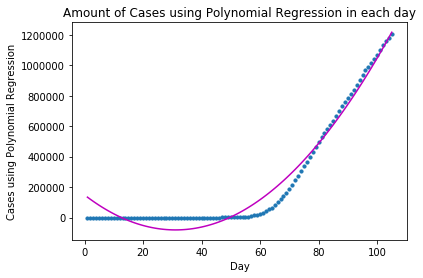

In [40]:
plot_graph("Cases using Polynomial Regression", x, y, y_pred)

##### degrees = 3

The forecast for Confirmed cases using Polynomial Regression (d=3) in the following 10 days is:
Day 1: 1325396
Day 2: 1373904
Day 3: 1423520
Day 4: 1474254
Day 5: 1526120
Day 6: 1579129
Day 7: 1633294
Day 8: 1688625
Day 9: 1745135
Day 10: 1802836


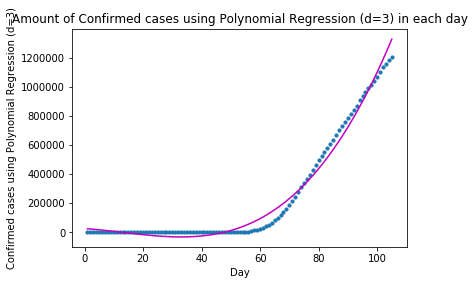

In [41]:
regression_model = PolynomialRegressionModel("Confirmed cases using Polynomial Regression (d=3)", 3)
regression_model.train(x, y)
y_pred = regression_model.get_predictions(x)
print_forecast("Confirmed cases using Polynomial Regression (d=3)", regression_model, 
               beginning_day=len(x), 
               limit=10)
plot_graph("Confirmed cases using Polynomial Regression (d=3)", x, y, y_pred)

#### Deaths with PR

##### Degrees = 2

The forecast for Deaths using Polynomial Regression in the following 10 days is:
Day 1: 68625
Day 2: 70718
Day 3: 72840
Day 4: 74992
Day 5: 77172
Day 6: 79382
Day 7: 81620
Day 8: 83888
Day 9: 86184
Day 10: 88510


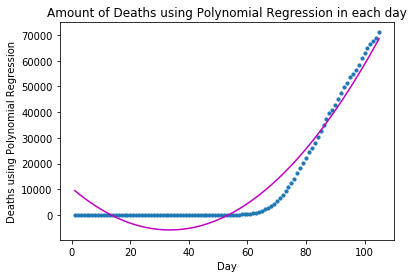

In [42]:
regression_model = PolynomialRegressionModel("Deaths using Polynomial Regression", 2)
regression_model.train(x_deaths, y_deaths)
y_deaths_pred = regression_model.get_predictions(x_deaths)
print_forecast("Deaths using Polynomial Regression", regression_model, 
               beginning_day=len(x_deaths), 
               limit=10)
plot_graph("Deaths using Polynomial Regression", x_deaths, y_deaths, y_deaths_pred)

The forecast for Deaths using Polynomial Regression (d=3) in the following 10 days is:
Day 1: 78671
Day 2: 81981
Day 3: 85378
Day 4: 88864
Day 5: 92440
Day 6: 96107
Day 7: 99866
Day 8: 103717
Day 9: 107663
Day 10: 111704


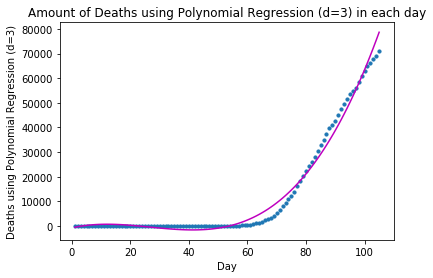

In [43]:
regression_model = PolynomialRegressionModel("Deaths using Polynomial Regression (d=3)", 3)
regression_model.train(x_deaths, y_deaths)
y_deaths_pred = regression_model.get_predictions(x_deaths)
print_forecast("Deaths using Polynomial Regression (d=3)", regression_model, 
               beginning_day=len(x_deaths), 
               limit=10)
plot_graph("Deaths using Polynomial Regression (d=3)", x_deaths, y_deaths, y_deaths_pred)

### Neural Network

#### Confirmed Cases with NN

In [44]:
from sklearn.neural_network import MLPRegressor

class NeuralNetModel:

    def __init__(self, model_name):
        self.__model_name = model_name
        self.__model = None

    def train(self, x, y, hidden_layer_sizes=[10,], learning_rate=0.001, max_iter=2000):
        self.__model = MLPRegressor(solver="adam", activation="relu", alpha=1e-5, random_state=0, 
                                    hidden_layer_sizes=hidden_layer_sizes, verbose=False, tol=1e-5, 
                                    learning_rate_init=learning_rate, max_iter=max_iter)
        self.__model.fit(x, y)

    def get_predictions(self, x):
        return np.round(self.__model.predict(x), 0).astype(np.int32)

In [45]:
neural_net_model = NeuralNetModel("Confirmed Cases using Neural Network")
neural_net_model.train(x, y, [80, 80], 0.001, 50000)

In [46]:
y_pred = neural_net_model.get_predictions(x)
y_pred

array([  -2590,   -1888,   -1186,    -484,     218,     919,    1865,
          3017,    4050,    4735,    4952,    4814,    4414,    3890,
          3298,    2706,    2115,    1523,     931,     340,    -252,
          -844,   -1435,   -2027,   -2618,   -3210,   -3802,   -5435,
         -7103,   -8921,  -10274,   -9435,   -8597,   -7759,   -6921,
         -6082,   -5244,   -4406,   -3568,   -2729,   -1891,   -1053,
          -214,     624,    1462,    2300,    3139,    3977,    4815,
          5653,    6492,    7330,    8168,    9006,    9845,   10683,
         11521,   13997,   18543,   24689,   33065,   43006,   53849,
         65515,   81718,  101487,  121255,  142265,  167302,  196523,
        225743,  254963,  284184,  313404,  342624,  371845,  401065,
        430285,  459506,  488726,  517946,  547167,  576387,  605607,
        634828,  664048,  693268,  722489,  751709,  780929,  810150,
        839370,  868590,  897811,  927031,  956251,  985472, 1014692,
       1043912, 1073

In [47]:
print_forecast("Confirmed Cases using Neural Network", neural_net_model, 
               beginning_day=len(x), 
               limit=10)

The forecast for Confirmed Cases using Neural Network in the following 10 days is:
Day 1: 1207755
Day 2: 1234444
Day 3: 1261134
Day 4: 1287823
Day 5: 1314513
Day 6: 1341202
Day 7: 1367892
Day 8: 1394581
Day 9: 1421271
Day 10: 1447960


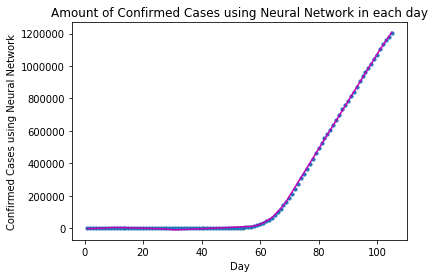

In [48]:
plot_graph("Confirmed Cases using Neural Network", x, y, y_pred)

#### Deaths with NN

The forecast for Deaths using Neural Network in the following 10 days is:
Day 1: 70959
Day 2: 72473
Day 3: 73987
Day 4: 75501
Day 5: 77016
Day 6: 78530
Day 7: 80044
Day 8: 81558
Day 9: 83072
Day 10: 84586


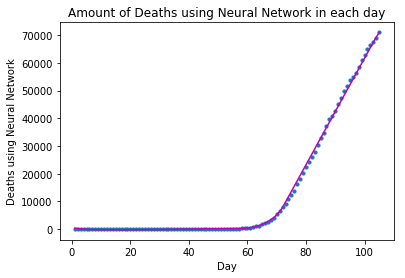

In [49]:
neural_net_model = NeuralNetModel("Deaths using Neural Network")
neural_net_model.train(x_deaths, y_deaths, [100, 100], 0.001, 50000)
y_deaths_pred = neural_net_model.get_predictions(x_deaths)
print_forecast("Deaths using Neural Network", neural_net_model, 
               beginning_day=len(x_deaths), 
               limit=10)
plot_graph("Deaths using Neural Network", x_deaths, y_deaths, y_deaths_pred)

To summarize, the predicted numbers for the confirmed cases and deaths for the next 10 days (as of EOD 05/15/2020) in the United States are different with varied models:

| Model | Confirmed | Deaths |  Death Rate  |
|----------------|----------|-----------|-----------|
| PR (d=2)	| 1,552,079 | 88,510	|  5.7%  |
| PR (d=3)	| 1,802,836	| 111,704 |  6.19%  |
| NN	| 1,447,960 | 84,586 |  5.84%  |

<h5><center>Table 2. The predicted numbers for the confirmed cases and deaths for the next 10 days (as of EOD 05/15/2020).</center></h5>

## SIR Model

The Polynomial Regression and Neural Network models used in the previous section did provide reasonable predictions to the confirmed and death numbers in upcoming days. However, these models did not consider the nature of infectious diseases in between the figures. Next, we will talk about how `Compartmental Modeling` techniques can be used to model infectious diseases (and in this case, the COVID-19), of which the simplest compartmental model is the `SIR model`. You can check out the descriptions to the model and its basic blocks in the Wiki Page <a href="https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model">here</a>. The SIR model is reasonably predictive for infectious diseases which are transmitted from human to human, and where recovery confers lasting resistance, such as measles, mumps and rubella.

As we can tell from the name of the model, it consists of three compartments: `S` for the number of `susceptible`, `I` for the number of `infectious`, and `R` for the number of `recovered` or deceased (or immune) individuals. Each member of the population typically progresses from susceptible to infectious to recovered.

<img src="http://www.public.asu.edu/~hnesse/classes/sireqn.png" />
<h5><center>Equation 1. SIR Model is an ordinary differential equation model, and can be described by the above equation (source: <a href="http://www.public.asu.edu">ASU</a>).</center></h5>

Parameters being used in the equation includes,
  - The infectious rate, `β`, controls the rate of spread which represents the probability of transmitting disease between a susceptible and an infectious individual. 
  - `D`, the average duration, or say days of infection.
  - The recovery rate, `γ = 1/D`, is determined by the average duration.
  - `N`, the total population of the study.


### Basic Reproduction Number

One of the critical question that epidemiologisits ask the most during each disease outbreak, is that how far and how fast a virus can spread through a population, and the `basic reproduction number` (a.k.a. the `R naught`, or `R0`) is often used to answer the question.

`R0` refers to "how many other people one sick person is likely to infect on average in a group that's susceptible to the disease (meaning they don’t already have immunity from a vaccine or from fighting off the disease before)", and is "super important in the context of public health because it foretells how big an outbreak will be. The higher the number, the greater likelihood a large population will fall sick" <a href="#References">[1]</a>.

Another mostly asked question is how contagious or deadly a virus is, and it together with `R0` can depict the most important properties of a virus. Take Measles as an example, as the most contagious virus researchers know about, measles can linger in the air of a closed environment and sicken people up to two hours after an infected person who coughed or sneezed there has left. `R0` of measles can be as high as 18, if people exposed to the virus aren't vaccinated. Let's now compare it to Ebola, which is more deadly but much less efficient in spreading. `R0` of Ebola is typically just 2, which in part might be due to many infected individuals die before they can pass the virus to someone else.


#### How a `R0` is computed?

In a basic scenario, the basic reproductive number `R0` equals to 
```
R0 = β/γ = β*D
```

However, in a fully susceptible population, `R0` is the number of secondary infections generated by the first infectious individual over the course of the infectious period, which is defined as,
```
R0=S*L*β
```

in which `S`=`the number of susceptible hosts`, `L`=`length of infection`, and `β`=`transmissibility`.


#### How to understand `R0`?

According to this <a href="https://www.healthline.com/health/r-nought-reproduction-number">heathline article</a>, there are three possibilities for the potential spread or decline of a disease, depending on its `R0` value:
  - If less than 1, each existing infection causes less than one new infection, and the disease will decline and eventually die out.
  - If equals to 1, each existing infection causes one new infection, and the disease will stay alive and stable, but there will not be an outbreak or an epidemic.
  - If more than 1, each existing infection causes more than one new infection, and the disease will spread between people, and there may be an outbreak or epidemic.


### Fit the SIR Model per country

In order to fit the SIR model with the actual number of confirmed cases (and the recovered, and death tolls), we need to estimate the `β` and `γ` parameters. In the process, we will use `solve_ivp` function in scipy module, to solve the ordinary differential equation in the SIR model.

In [54]:
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from datetime import timedelta, datetime

"""The dict defined here includes the countries to run the model against,
   and the date that the first confirmed case was reported.
"""
START_DATE = {
  'China, Sum': '1/22/20',
  'Japan': '1/22/20',
  'Korea, South': '1/22/20',
  'US': '1/22/20',
  'Italy': '1/31/20',
  'Spain': '2/1/20',
  'Iran': '2/19/20'
}

In [61]:
rho = 1

In [83]:
class Learner(object):
    """constructs an SIR model learner to load training set, train the model,
       and make predictions at country level.
    """
    def __init__(self, country, loss, start_date, predict_range,s_0, i_0, r_0):
        self.country = country
        self.loss = loss
        self.start_date = start_date
        self.predict_range = predict_range
        self.s_0 = s_0
        self.i_0 = i_0
        self.r_0 = r_0

    def load_confirmed(self, country):
      """
      Load confirmed cases downloaded from pre-made dataframe
      """
      country_df = world_confirmed_ts_df[world_confirmed_ts_df["Country/Region"] == country]
      return country_df.iloc[0].loc[START_DATE[country]:]

    def load_dead(self, country):
      """
      Load deaths downloaded from pre-made dataframe
      """
      country_df = world_deaths_ts_df[world_deaths_ts_df["Country/Region"] == country]
      return country_df.iloc[0].loc[START_DATE[country]:]

    def load_recovered(self, country):
      """
      Load recovered cases downloaded from pre-made dataframe
      """
      country_df = world_recovered_ts_df[world_recovered_ts_df["Country/Region"] == country]
      return country_df.iloc[0].loc[START_DATE[country]:]

    def extend_index(self, index, new_size):
        values = index.values
        current = datetime.strptime(index[-1], '%m/%d/%y')
        while len(values) < new_size:
            current = current + timedelta(days=1)
            values = np.append(values, datetime.strftime(current, '%m/%d/%y'))
        return values

    def predict_0(self, beta, gamma, data):
        """
        Simplifield version.
        Predict how the number of people in each compartment can be changed through time toward the future.
        The model is formulated with the given beta and gamma.
        """
        predict_range = 150
        new_index = self.extend_index(data.index, predict_range)
        size = len(new_index)
        def SIR(t, y):
            S = y[0]
            I = y[1]
            R = y[2]
            return [-rho*beta*S*I, rho*beta*S*I-gamma*I, gamma*I]
        extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
        return new_index, extended_actual, solve_ivp(SIR, [0, size], [S_0,I_0,R_0], t_eval=np.arange(0, size, 1))
    
    def predict(self, beta, gamma, data, recovered, death, country, s_0, i_0, r_0):
        """
        Predict how the number of people in each compartment can be changed through time toward the future.
        The model is formulated with the given beta and gamma.
        """
        new_index = self.extend_index(data.index, self.predict_range)
        size = len(new_index)

        def SIR(t, y):
            S = y[0]
            I = y[1]
            R = y[2]
            return [-rho*beta*S*I, rho*beta*S*I-gamma*I, gamma*I]

        extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
        extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
        extended_death = np.concatenate((death.values, [None] * (size - len(death.values))))
        solved = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))
        return new_index, extended_actual, extended_recovered, extended_death, solved

    def train_0(self):
        """
        Simplified version.
        Run the optimization to estimate the beta and gamma fitting the given confirmed cases.
        """
        data = self.load_confirmed(self.country)
        optimal = minimize(
            loss,
            [0.001, 0.001],
            args=(data),
            method='L-BFGS-B',
            bounds=[(0.00000001, 0.4), (0.00000001, 0.4)]
        )
        beta, gamma = optimal.x
        new_index, extended_actual, prediction = self.predict(beta, gamma, data)
        df = pd.DataFrame({
            'Actual': extended_actual,
            'S': prediction.y[0],
            'I': prediction.y[1],
            'R': prediction.y[2]
        }, index=new_index)
        fig, ax = plt.subplots(figsize=(15, 10))
        ax.set_title(self.country)
        df.plot(ax=ax)
        fig.savefig(f"{self.country}.png")
        
    def train(self):
        """
        Run the optimization to estimate the beta and gamma fitting the given confirmed cases.
        """
        recovered = self.load_recovered(self.country)
        death = self.load_dead(self.country)
        data = (self.load_confirmed(self.country) - recovered - death)

        optimal = minimize(loss, [0.001, 0.001], 
                           args=(data, recovered, self.s_0, self.i_0, self.r_0), 
                           method='L-BFGS-B', 
                           bounds=[(0.00000001, 0.4), (0.00000001, 0.4)])
        print(optimal)

        beta, gamma = optimal.x
        new_index, extended_actual, extended_recovered, extended_death, prediction = self.predict(beta, gamma, data, 
                                                                                                  recovered, death, 
                                                                                                  self.country, self.s_0, 
                                                                                                  self.i_0, self.r_0)
        df = pd.DataFrame({'Infected data': extended_actual, 'Recovered data': extended_recovered, 
                           'Death data': extended_death, 'Susceptible': prediction.y[0], 
                           'Infected': prediction.y[1], 'Recovered': prediction.y[2]}, index=new_index)

        fig, ax = plt.subplots(figsize=(15, 10))
        ax.set_title(self.country)
        df.plot(ax=ax)
        print(f"country={self.country}, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
        fig.savefig(f"{self.country}.png")

We need to also define the loss function to be used in the optimization process - note that the `the root mean squared error (RMSE)` not only considers the confirmed cases, but also the recovered.

In [84]:
def loss(point, data, recovered, s_0, i_0, r_0):

    size = len(data)
    beta, gamma = point

    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-rho*beta*S*I, rho*beta*S*I-gamma*I, gamma*I]

    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1

    return alpha * l1 + (1 - alpha) * l2

Now let's run the estimation process against major countries suffering from the CODIV-19 outbreak. The following cells illustrate how the number of the compartment can be changed over time, according to the SIR model. 

How to decide the initial values of compartments? This is based on two conditions: the rough inference of the max quantity of susceptible people for each country, and the computation capacity (the execution takes overly long time for 1 million susceptible population). Though SIR model expects the susceptible to be homogenous, well-mixed, and accessible to each other, setting the whole population in the country is not realistic for sure. In this case, let's set the compartment 100000 to start with.

Also in the initial settings, the initial infectious people were 2 for every country, and the start of the outbreak is varied, as specified in the `START_DATE` dict object.

####  The initial batch of SIR Model fitting

      fun: 6587.058872381439
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 6.53878068e+06, -4.02978549e+02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 252
      nit: 24
   status: 0
  success: True
        x: array([5.78634018e-06, 2.77995546e-02])
country=China, Mainland, beta=0.00000579, gamma=0.02779955, r_0:0.00020815
      fun: 4586.716297155509
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.00266636e+06, -9.26613211e+01])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 126
      nit: 1
   status: 2
  success: False
        x: array([1.e-08, 1.e-08])
country=Korea, South, beta=0.00000001, gamma=0.00000001, r_0:1.00000000


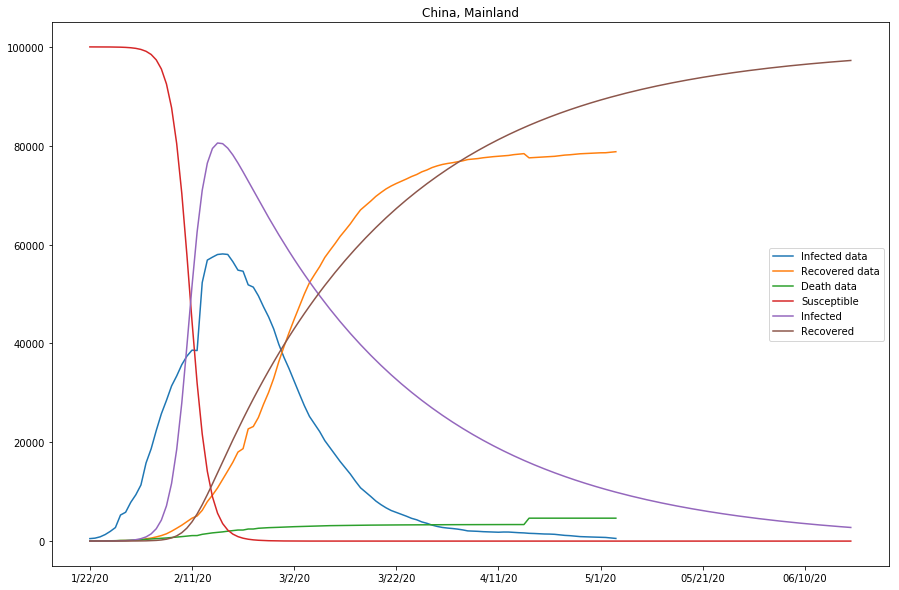

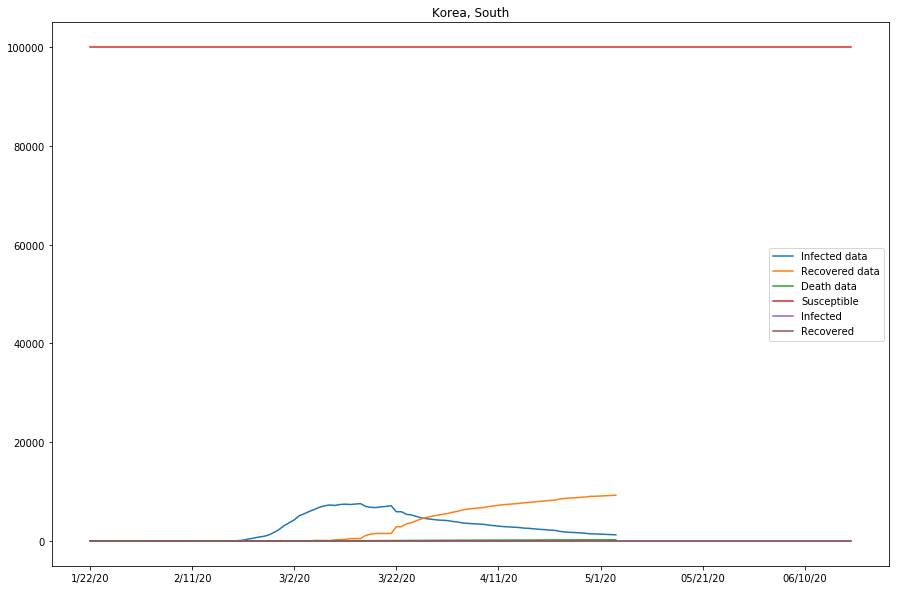

In [37]:
countries = ['China, Sum', 'Korea, South']
predict_range = 150
s_0 = 100000
i_0 = 2
r_0 = 10

for country in countries:
    start_date = START_DATE[country]
    learner = Learner(country, loss, start_date, predict_range, s_0, i_0, r_0)
    learner.train()

How do we decide if the model is a good approximation? First, by observing if curves of the `Infected data` and the projected `Infected`, if these two are close together; Second, by observing if the `Recovered data` and the projected `Recovered` curves are also close. For instance, in the previous cell output, we can see the approximation of the model is doing fairly nice for that of Mainland China, but not as ideal for that of South Korea.

      fun: 956.3617735632349
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 7.03964167e+07, -4.09231037e+04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 84
      nit: 3
   status: 0
  success: True
        x: array([9.01138539e-07, 1.71799185e-07])
country=Japan, beta=0.00000090, gamma=0.00000017, r_0:5.24530158
      fun: 8066.350370756334
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.82047964e+09, 2.70774337e+04])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 324
      nit: 15
   status: 2
  success: False
        x: array([2.82581482e-06, 1.31222175e-01])
country=Italy, beta=0.00000283, gamma=0.13122218, r_0:0.00002153
      fun: 11875.088180948936
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.66611870e+08, 4.90577404e+03])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 588
      nit: 31
   status: 0
  success: True
        x: arra

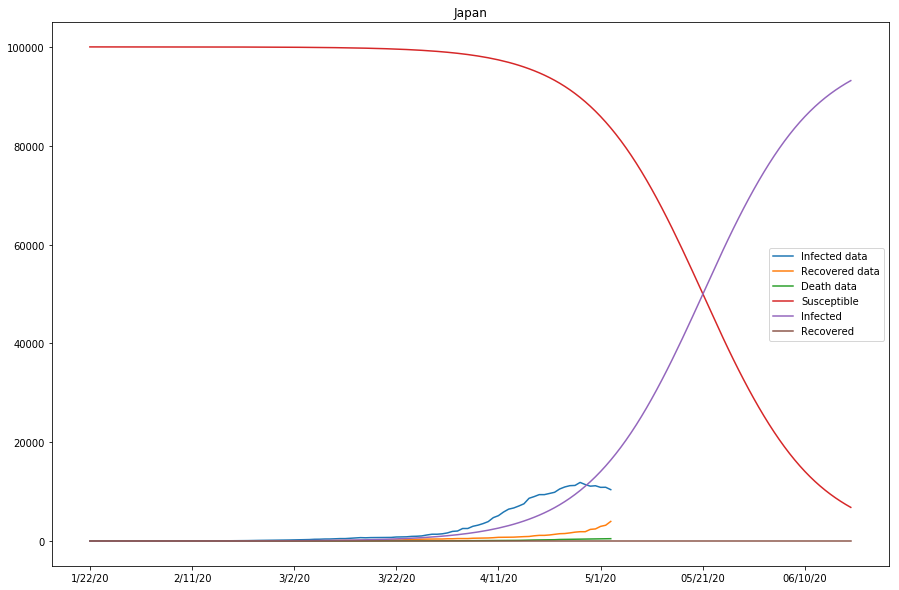

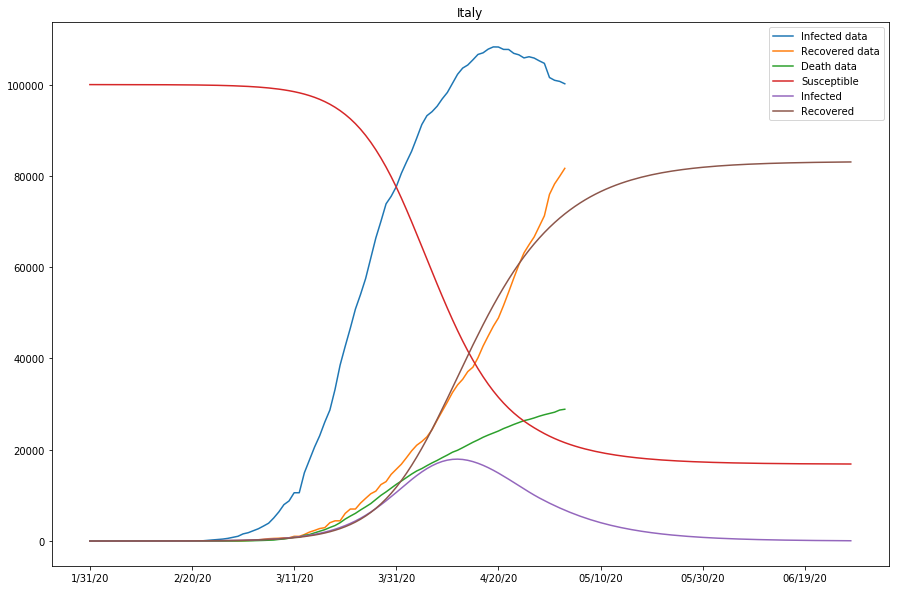

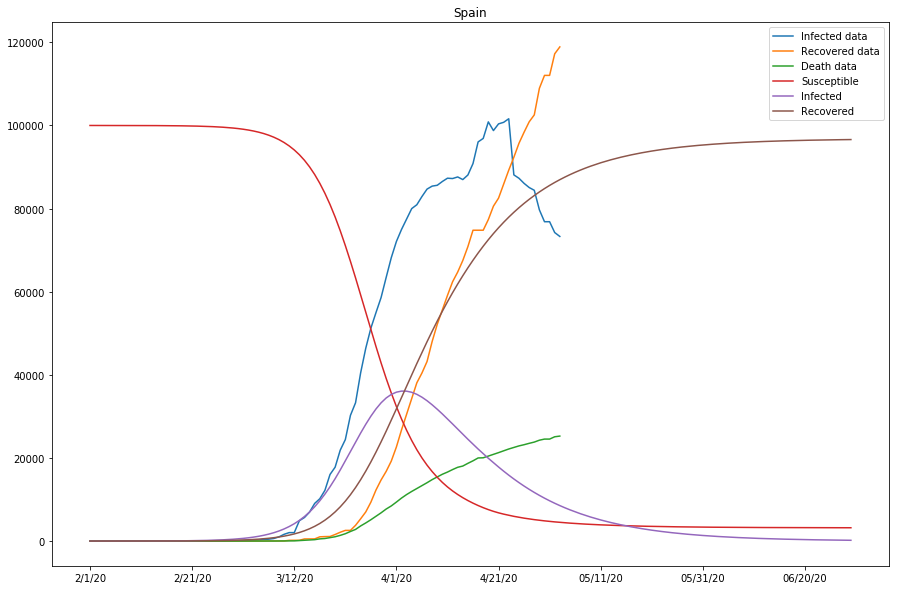

In [11]:
countries = ['Japan', 'Italy', 'Spain']
predict_range = 150
s_0 = 100000
i_0 = 2
r_0 = 10

for country in countries:
    start_date = START_DATE[country]
    learner = Learner(country, loss, start_date, predict_range, s_0, i_0, r_0)
    learner.train()

As seen in the cell output above, the approximation of the model is looking reasonably good for that of Japan, and Spain, but not as ideal for that of Italy - the gap between the `Infected data` and the projected `Infected` curves is overly large, and so is that between the `Recovered data` and `Recovered` curves.

      fun: 56475.167553026185
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([4.09579889e+08, 3.07954906e+03])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 294
      nit: 15
   status: 2
  success: False
        x: array([2.24120778e-06, 6.44507741e-02])
country=US, beta=0.00000224, gamma=0.06445077, r_0:0.00003477


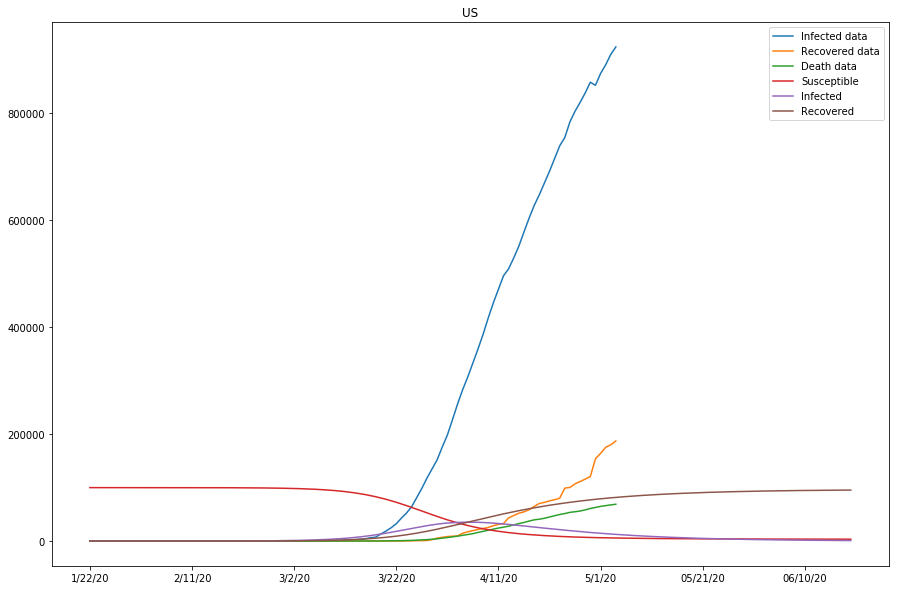

In [39]:
predict_range = 150
s_0 = 100000
i_0 = 2
r_0 = 10

country="US"
start_date = START_DATE[country]
learner = Learner(country, loss, start_date, predict_range, s_0, i_0, r_0)
learner.train()

Table 3 (as shown below) displays what we have got so far with the model, for the studied countries. Note that the last column represents if the approximation of the model is good, or else parameters need to be modified before the 2nd batch of fitting.

|  Countries  |  Beta  |  Gamma  |  R0  |  Good approximation?  | 
|---|---|---|---|---|
|  China  |  0.00000579  |  0.02779955  |  0.00020815  |  True  |
|  Japan  |  0.0000009  |  0.00000017  |  5.24530158  |  True  |
|  Korea  |  0.00000001  |  0.00000001  |  1.00000000  |  False  |
|  Italy  |  0.00000283  |  0.13122218  |  0.00002153  |  False  |
|  Spain  |  0.00000269  |  0.07595676  |  0.00003545  |  True  |
|  US  |  0.00000224  |  0.06445077  |  0.00003477  |  False  |

<h5><center>Table 3. The computed Beta, Gamma, and R0 values for studied countries (with data collected up to EOD 05/05/2020).</center></h5>

Now the SIR model is well-fitting the actual data for both confirmed and recovered cases. The `R0` values of Japan and South Korea are significantly higher than in other countries, which might be caused by the relatively lower recovery rates in both countries, or that the initial values can be assumed wrong (or that the model fails to find the global minimum in the optimization process).

On the other hand, the total number of confirmed cases for the United States is way higher than the initial susceptible number we picked here. The trends for S, I, and R, and the R0 value hence computed would not make much sense. In the following cells, we will experiment with larger susceptible numbers (and/or longer prediction periods), and see how the results would differ.

####  The second batch of SIR Model fitting

Let's run the model again with modified parameters for the countries that (1) were showing unreasonably high R0 values, or (2) failed to make good approximation in the initial batch.

      fun: 393.1585139602229
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.35322513e+09,  2.72431718e+04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 162
      nit: 13
   status: 0
  success: True
        x: array([2.28719663e-06, 2.95855494e-02])
country=Japan, beta=0.00000229, gamma=0.02958555, r_0:0.00007731


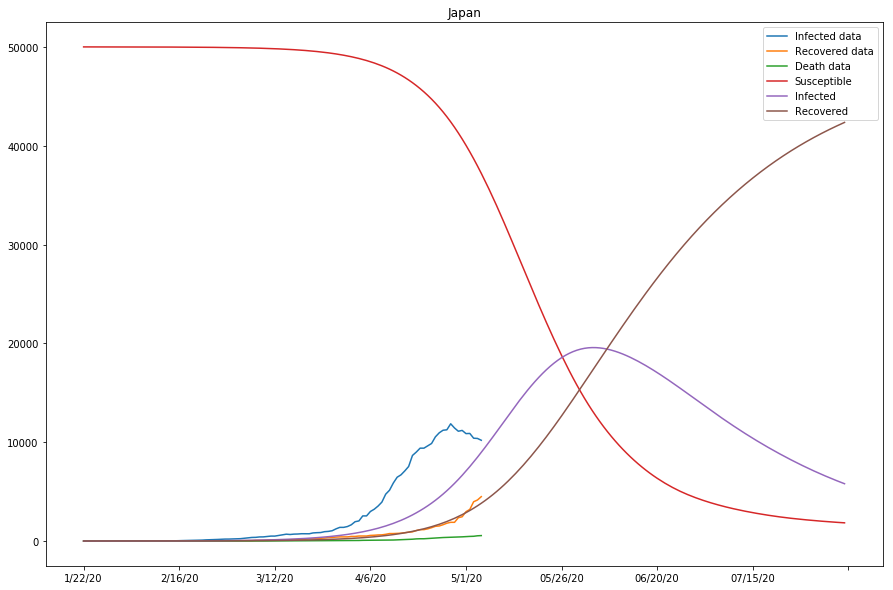

In [59]:
predict_range = 200
s_0 = 50000
i_0 = 2
r_0 = 10

country="Japan"
start_date = START_DATE[country]
learner = Learner(country, loss, start_date, predict_range, s_0, i_0, r_0)
learner.train()

      fun: 1467.5744435396693
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([5.64405953e+06, 4.42939768e+02])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 429
      nit: 23
   status: 2
  success: False
        x: array([8.09906555e-06, 1.01871025e-02])
country=Korea, South, beta=0.00000810, gamma=0.01018710, r_0:0.00079503
      fun: 4106.667883958562
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.42270198e+08, -1.26456959e+05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 558
      nit: 28
   status: 0
  success: True
        x: array([1.02582842e-06, 1.63684728e-02])
country=Italy, beta=0.00000103, gamma=0.01636847, r_0:0.00006267
      fun: 16716.517752729582
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([9.05226605e+11, 9.36626162e+05])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 300
      nit: 14
   status: 2
  success: False
        x: array([1.6

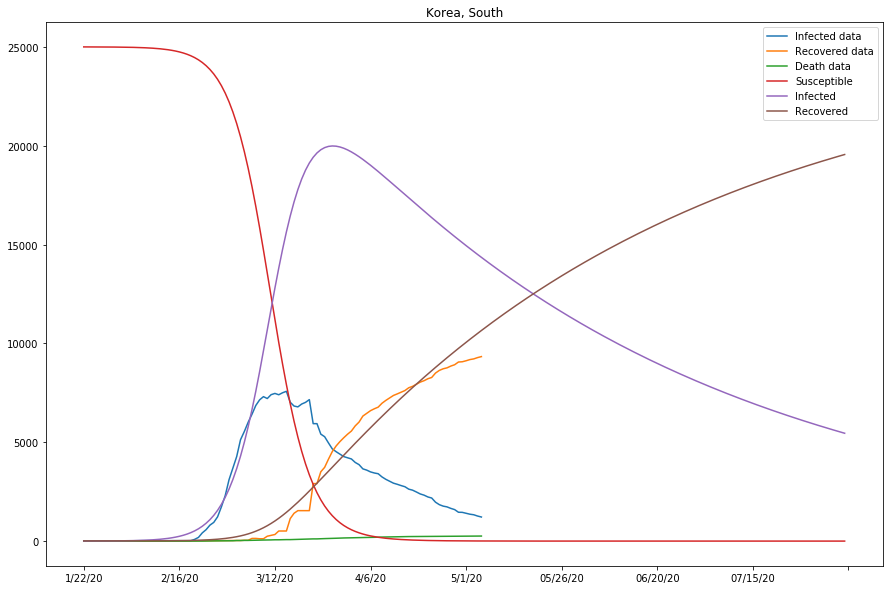

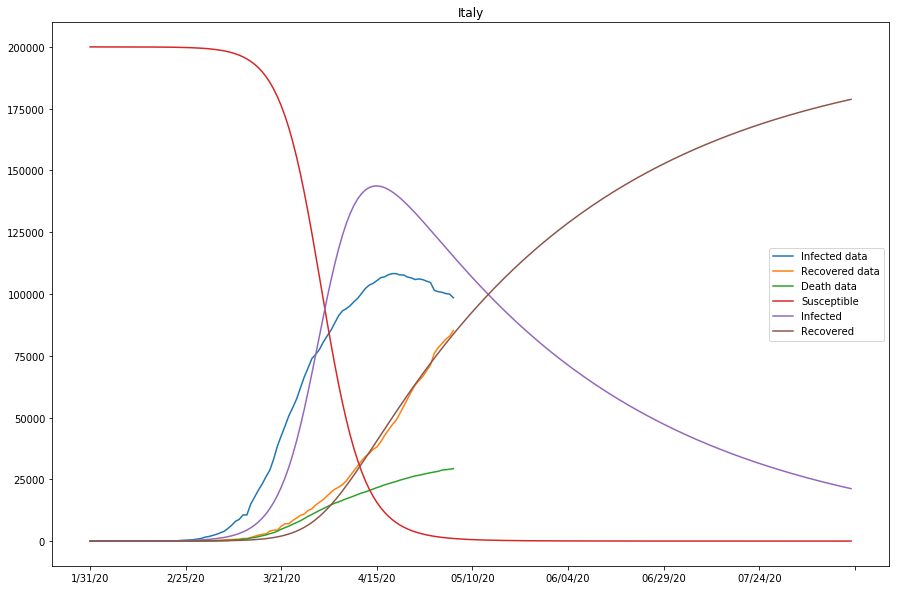

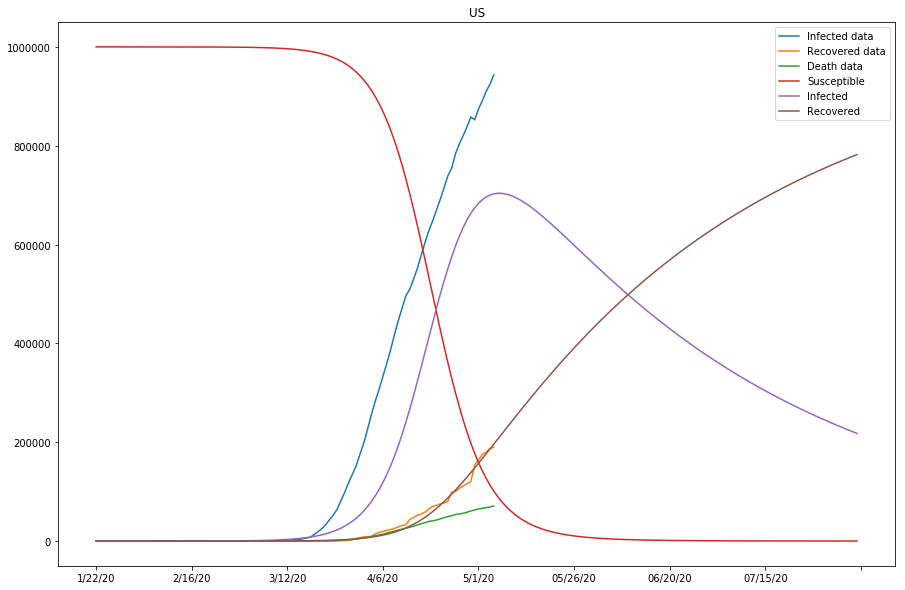

In [58]:
countries = ['Korea, South', 'Italy', 'US']
predict_range = 200
s_0_values = [25000, 200000, 1000000]
i_0 = 2
r_0 = 10

for country, s_0 in zip(countries, s_0_values):
    start_date = START_DATE[country]
    learner = Learner(country, loss, start_date, predict_range, s_0, i_0, r_0)
    learner.train()

Table 4 (as shown below) lists the modified Beta, Gamma, and R0 values for Korea, Italy and US. Note that the last column represents if the approximation of the model is good, or else parameters need to be modified before the 3rd batch of fitting.

|  Countries  |  Beta  |  Gamma  |  R0  |  Good approximation?  | 
|---|---|---|---|---|
|  China  |  0.00000579  |  0.02779955  |  0.00020815  |  True  |
|  Japan  |  0.00000229  |  0.02958555  |  0.00007731  |  True  |
|  Korea  |  0.00000810  |  0.01018710  |  0.00079503  |  True  |
|  Italy  |  0.00000103  |  0.01636847  |  0.00006267  |  True  |
|  Spain  |  0.00000269  |  0.07595676  |  0.00003545  |  True  |
|  US  |  0.00000016  |  0.01393883  |  0.00001166  |  False  |

<h5><center>Table 4. The Beta, Gamma, and R0 values computed out of the 2nd batch model fitting for studied countries (with data collected up to EOD 05/05/2020).</center></h5>

Up to this point, we have run two batches of SIR model fitting, and all countries of study except for the United States have shown good approximations to the model (with modified parameters). Because the susceptible values set for the United States so far have been too low compared to the actual confirmed cases, we are going to continue modifying the `s_0` values for the United States, and see if by doing so, the approximation of the model fitting can be improved in the next section.

#### The final batch of SIR Model fitting

      fun: 36149.19701398071
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.11513726e+12, 5.05126579e+05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 309
      nit: 10
   status: 0
  success: True
        x: array([7.40946166e-08, 1.16066783e-02])
country=US, beta=0.00000007, gamma=0.01160668, r_0:0.00000638


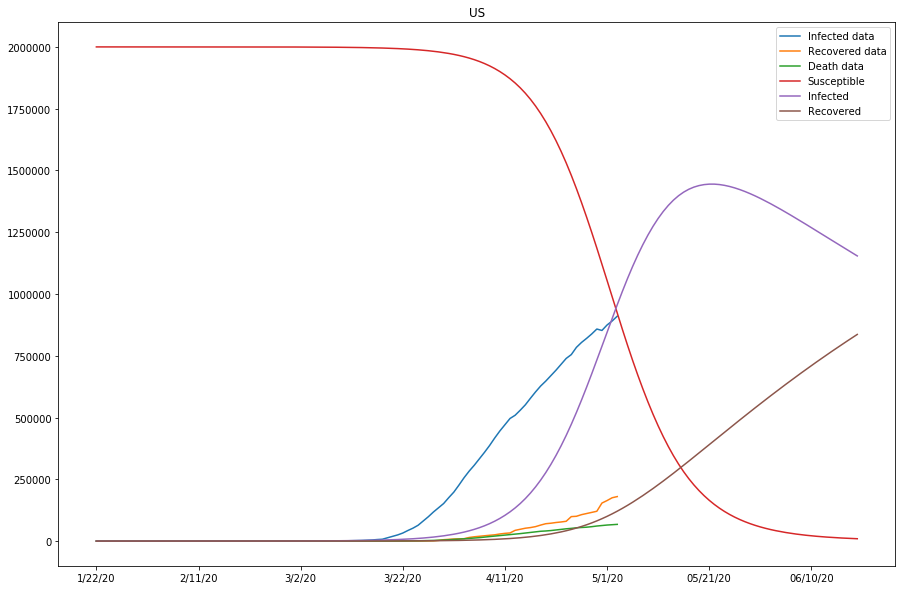

In [16]:
predict_range = 150
s_0 = 2000000
i_0 = 2
r_0 = 10

country="US"
start_date = START_DATE[country]
learner = Learner(country, loss, start_date, predict_range, s_0, i_0, r_0)
learner.train()

      fun: 57715.19369648794
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.70304279e+11, -1.73848135e+05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 306
      nit: 8
   status: 0
  success: True
        x: array([4.53907703e-08, 4.81557985e-03])
country=US, beta=0.00000005, gamma=0.00481558, r_0:0.00000943


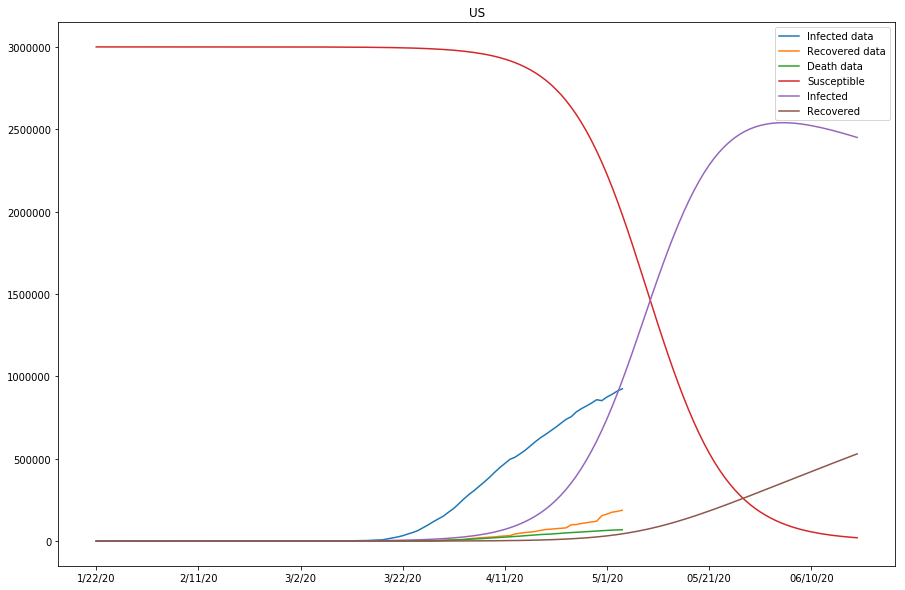

In [38]:
predict_range = 150
s_0 = 3000000
i_0 = 2
r_0 = 10

country="US"
start_date = START_DATE[country]
learner = Learner(country, loss, start_date, predict_range, s_0, i_0, r_0)
learner.train()

      fun: 73619.54323120386
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.06846161e+12, -3.39534017e+02])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 237
      nit: 9
   status: 2
  success: False
        x: array([2.91771467e-08, 1.63383548e-04])
country=US, beta=0.00000003, gamma=0.00016338, r_0:0.00017858


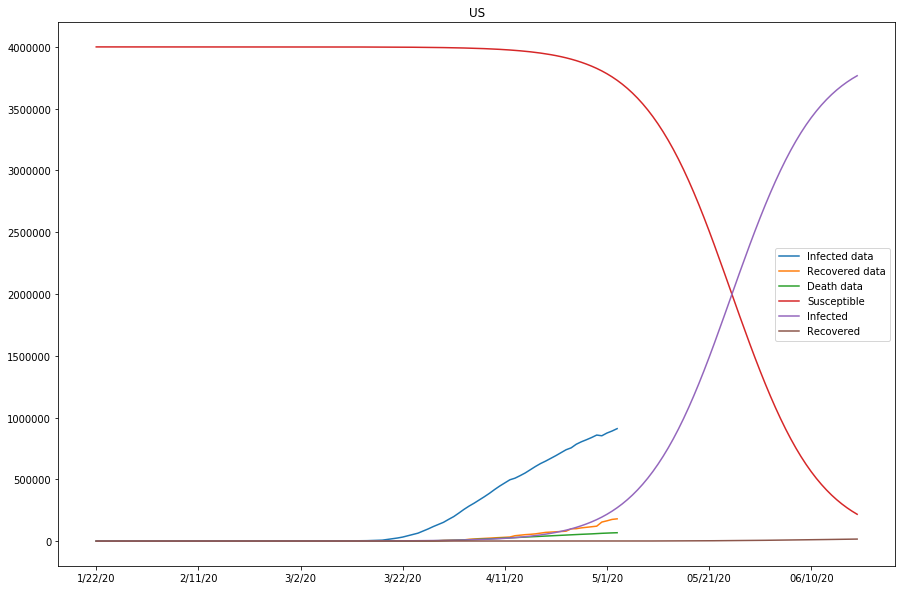

In [19]:
predict_range = 150
s_0 = 4000000
i_0 = 2
r_0 = 10

country="US"
start_date = START_DATE[country]
learner = Learner(country, loss, start_date, predict_range, s_0, i_0, r_0)
learner.train()

|  s_0  |  Beta  |  Gamma  |  R0  |  Date of Peak  |  Max Infected Population  |
|---|---|---|---|---|---|
|  0.1M  |  0.00000224  |  0.06445077  |  0.00003477  |  Not applicable  |  Not applicable  |
|  1M  |  0.00000016  |  0.01393883  |  0.00001166  |  Not applicable  |  Not applicable  |
|  2M  |  0.00000007  |  0.01160668  |  0.00000638  |  05/21/2020  |  1.5M  |
|  3M  |  0.00000005  |  0.00481558  |  0.00000943  |  06/10/2020  |  2.5M  |
|  4M  |  0.00000003  |  0.00016338  |  0.00017858  |  >06/21/2020  |  > 4M  |

<h5><center>Table 5. The Beta, Gamma, and R0 values computed out of the 3rd batch model fitting for the United States (with data collected up to EOD 05/05/2020).</center></h5>

####  Consider the social distancing effect in SIR Model fitting

Efforts of social distancing can mitigate the spread of infectious disease, and impact the transmitting/infectious rate, `β`. Now, let's introduce this new value, `ρ`, to describe the social distancing effect. It is going to be ranging from 0 to 1, where 0 indicates everyone is locked down and quarantined (as individuals), and 1 is equivalent to the base case demonstrated above. With `ρ` being defined, the SIR model will be modified as:
```
S' = -ρ*β*S*I
```

We have already seen the trends of SIR model fitting when ρ=1. Now, let's set ρ to 0.8, and 0.5, and see the flattening effect as the social distancing effects got increased to contain the disease over a set period of time.

In [72]:
rho = 0.8

      fun: 35870.206552712465
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([3.27846252e+11, 1.20160323e+05])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 312
      nit: 17
   status: 2
  success: False
        x: array([9.28349274e-08, 1.10504275e-02])
country=US, beta=0.00000009, gamma=0.01105043, r_0:0.00000840


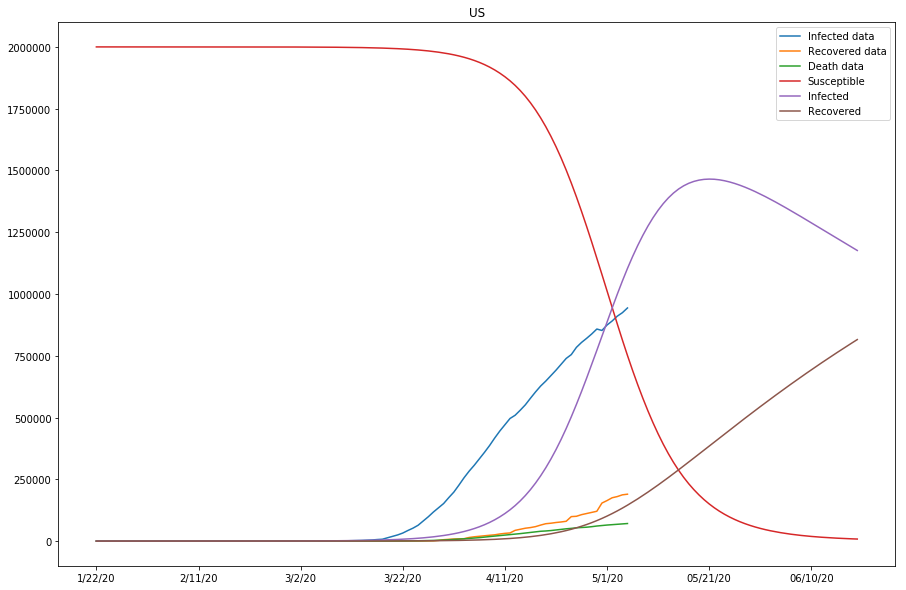

In [73]:
predict_range = 150
s_0 = 2000000
i_0 = 2
r_0 = 10

country="US"
start_date = START_DATE[country]
learner = Learner(country, loss, start_date, predict_range, s_0, i_0, r_0)
learner.train()

In [74]:
rho = 0.5

      fun: 25621.019857582738
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.36552606e+12, 8.07497675e+05])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 243
      nit: 4
   status: 2
  success: False
        x: array([1.53580170e-07, 1.51706477e-02])
country=US, beta=0.00000015, gamma=0.01517065, r_0:0.00001012


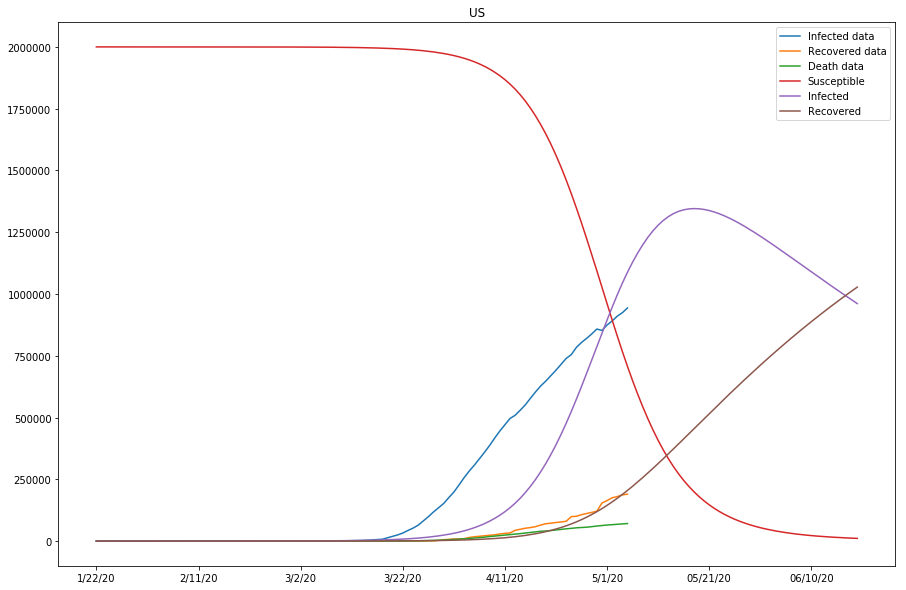

In [75]:
predict_range = 150
s_0 = 2000000
i_0 = 2
r_0 = 10

country="US"
start_date = START_DATE[country]
learner = Learner(country, loss, start_date, predict_range, s_0, i_0, r_0)
learner.train()

As listed in Table 6, social distancing efforts will likely improve the survivability of the disease by giving ore time for treatments and supplies to develop while keeping the peaks low.

|  Rho  |  Beta  |  Gamma  |  R0  |  Date of Peak  |  Max Infected Population  |
|---|---|---|---|---|---|
|  1  |  0.00000007  |  0.01160668  |  0.00000638  |  05/21/2020  |  1.5M  |
|  0.8  |  0.00000009  |  0.01105043  |  0.00000840  |  05/23/2020  |  1.375M  |
|  0.5  |  0.00000015  |  0.01517065  |  0.00001012  |  05/25/2020  |  1.3M  |

<h5><center>Table 6. The Beta, Gamma, and R0 values computed with different `Rho` factors (when `S`=2M) for the United States (with data collected up to EOD 05/05/2020).</center></h5>

## Comparison between models

|  Category  |  SIR  |  SEIR [18]  |  CHIME  |
|---|---|---|---|
|  Definition  |  Simple & Basic compartmental model  |  a derivative of SIR model that contains `exposed` (infected but not infectious)  |  COVID19 Hospital Impact Model for Epidemics  |
|  Latency Period  |  No  |  Yes  |  No  |
|  Progress of Individuals  |  S-I-R  |  S-E-I-R  |  S-I-R  |
|  Examples  |  N = S+I+R  |  N = S+E+I+R  |  N = S+I+R  |

## Conclusions

Before vaccines to COVID-19 come available to all, what governments can do is only to slow down the transmission. By doing so, we don’t actually stop the spread but keep the transmission and the active cases at a point that in the time being well within the limits of the handling capacity of medical facilities. This is what we call as `Flattening The Curve`. As advised by experts, there are at least three measures to help flatten the curve:
  1. Place travel restrictions; the transmission could be reduced by restricting people from traveling in or out of a particular region with high infections.
  2. Keep social distance; As shown in the SIR modeling that COVID-19 has a high `R0` and each infected person ends up infecting 2 or 3 people, social distancing might be the most significant in reducing transmission from the infected to the others.
  3. Have more testing done. Testing is necessary to quickly identify and isolate the infected from the non-infected given that Covid-19 has a long incubation period (ranging from 2 to 26 days, while symptoms usually start appearing after 5-7 days), it is possible for an infected individual to spread the infection to others without his/her even knowing.
  
As stated by Thomas Pueyo in his <a href="https://medium.com/@tomaspueyo/coronavirus-act-today-or-people-will-die-f4d3d9cd99ca">Medium Post</a> (which can be seen in the illustration below), when combining Transmission reduction and Travel restriction, if transmission rate of COVID-19 went down by even 25%, it could delay the peak by almost 14 weeks. Further reduction would delay it even more.  

<img src="https://miro.medium.com/max/2942/1*aXhYA5D5PdTFjCTbFv8zmg.png" />

Together with what we have seen from the SIR modeling, reducing the transmission rate, and keeping the number of compartment small is crucial to flattening the curve. All should act together and fight the pandemic!

## References

[1] https://www.vox.com/2020/2/18/21142009/coronavirus-covid19-china-wuhan-deaths-pandemic

[2] https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge

[3] https://github.com/CSSEGISandData/COVID-19/tree/master/csse_COVID_19_data/csse_covid_19_time_series

[4] https://github.com/CSSEGISandData/COVID-19/tree/web-data

[5] http://gabgoh.github.io/COVID/index.html

[6] https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

[7] https://www.lewuathe.com/COVID-19-dynamics-with-sir-model.html

[8] https://github.com/Lewuathe/COVID19-SIR

[9] https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_India

[10] https://medium.com/@tomaspueyo/coronavirus-act-today-or-people-will-die-f4d3d9cd99ca

[11] https://science.sciencemag.org/content/early/2020/03/05/science.aba9757

[12] https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology

[13] https://science.sciencemag.org/content/early/2020/03/05/science.aba9757/tab-figures-data

[14] https://thespinoff.co.nz/politics/22-03-2020/siouxsie-wiles-toby-morris-what-does-level-two-mean-and-why-does-it-matter/

[15] https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

[16] https://www.weforum.org/agenda/2020/03/COVID19-coronavirus-countries-infection-trajectory/

[17] https://in.springboard.com/blog/data-modelling-covid/

[18] https://penn-chime.phl.io/